# Графы
Материал взят из:  
- Classic Computer Science Problems in Python
- Introduction to The Design & Analysis of Algorithms (Anany Levitin)

## Терминология

**Граф** - это совокупность точек на плоскости, называемых *вершинами*, часть из которых соединена отрезками (*ребрами*)
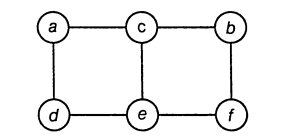

In [1]:
# граф можно представить как два множества
# V - вершины, E - пары вершин, означающие ребра
V = {'a', 'b', 'c', 'd', 'e', 'f'}
E = {('a', 'c'), ('a', 'd'),
     ('b', 'c'), ('b', 'f'),
     ('e', 'c'), ('e', 'f'), ('e', 'd')}

G = (V, E)

Граф называется **неориентированным**, если ребра не имеют направления, то есть пара `('a', 'b')` означает то же самое, что и пара `('b', 'a')`. В ином случае граф является **ориентированным (directed)**. 

Граф называют **взвешенным (weighted graph)**, если каждое ребро имеет **вес/стоимость (weight/cost)**.

Граф называется **полным (complete)**, если каждая пара вершин соединена ребром. Стандартное обозначение для полного графа, состоящего из $|V|$ вершин: $K_{|V|}$.  
Граф называется **плотным (dense)**, если он *почти полный*. В ином случае граф называют **разреженным (sparse)**.

## Представление графа
В компьютерным программах чаще всего графы представляют двумя способами:
- **Матрица смежности (adjacency matrix)**. Это матрица размера $n*n$, где $n = |V|$. Каждая строка и каждый столбец соответствуют одной из вершин графа. $[i, j]$ - ый элемент этой матрицы равен количеству ребер, проведенных из вершины $i$ в вершину $j$.
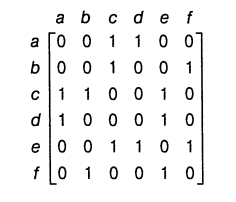
Для неориентированного графа матрица смежности всегда симметрична  
- **Cвязанные списки смежных вершин (adjancency linked lists)** - это совокупность связанных списков (по одному на каждую вершину), в которых содержится информация обо всех смежных вершинах для текущей вершины. Обычно в начале каждого подобного списка располагается вершина, для которой этот список составлен:
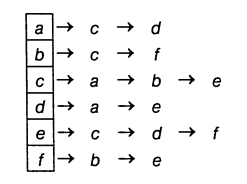


! Связанные списки хороши для *разреженных графов*, поскольку требуется не так много оперативной памяти (если использовать матрицу, то она будет почти вся заполнена нулями). В случае *плотных графов* лучше использовать матрицу смежности.


В случае взвешенного графа матрица смежности преобразуется в **матрицу весов/стоимости (weight/cost matrix)**. Её элементы $A[i, j]$ равны стоимости ребра из $i$ в $j$. В случае, если ребра между вершинами нет, ставится специальный знак (например, бесконечность). Что касается связанных списков, то их, в случае взвешенного графа, необходимо расширить:
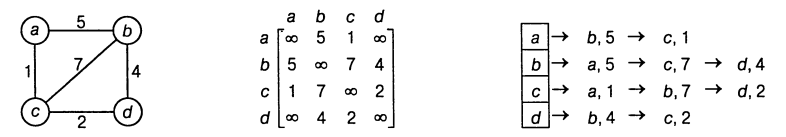

## Свойства графа
Для решения огромного количества задач важны некоторые свойства графов. Следует начать с терминологии, которая необходима для пояснения некоторых свойств:  
**Путь (path)** или **маршрут** от вершины $u$ к вершине $v$ - это последовательность смежных (соединенных ребром) вершин, которая начинается в $u$ и заканчивается в $v$. Путь называют **простым (simple)**, если все ребра, входящие в него, различны. Под **длиной (length)** пути подразумевается количество ребер, которые составляют этот путь (*данный термин следует использовать аккуратно, когда речь идет о взвешенных графах*). 

Первое важное свойство - **связность (connectivity)** - свойство графа, означающее, что для любой пары вершин $(u, v)$ этого графа существует путь из $u$ в $v$. *Объяснение:* если представить вершины графа как шары, а совокупность всех ребер как длинную веревку, то связный граф - этот тот граф, который можно *удержать в одной руке*, то есть одной веревки будет достаточно для того, чтобы соединить все шары. Если граф не является связным, то потребуется несколько веревок. *Строго говоря*, граф либо является связным, либо состоит из отдельных участков, называемых **компонентами связности (connected component** - максимальный связный подграф исходного графа).
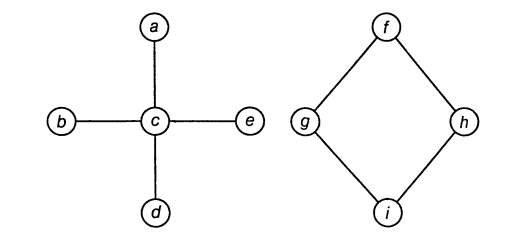
Данный граф состоит из 9 вершин и 8 ребер. Он имеет два компонента связности.  


Второе важное свойство - это **ацикличность (acyclic)** - свойство графа, означающее, что он не содержит **циклов** (**cycle** - простой путь положительной длины, который начинается и заканчивается в одной и той же вершине). В примере выше путь f-h-i-g-f является циклом. Подграф (b,c,a,e,d) является ациклическим.

## Моделирование реальной задачи
Известный предприниматель Илон Маск предложил построить между крупными районами США высокоскоростную транспортную сеть HyperLoop, состоящую из капсул, перемещающихся в герметичных трубах. По его мнению, высокая скорость перемещения капсул позволит создать экономически эффективный междугородный транспорт.

Построим графовую структуру, внесем в неё данные предложенной модели и рассмотрим на этом примере реальные алгоритмы и свойства графов. 

In [7]:
# связь/ребро
class Edge:
    def __init__(self, u, v):
        # ребро
        self.u_index = u # из какой вершины
        self.v_index = v # в какую вершину
        # вершины будут представлены числовыми индексами
    
    def reversed(self):
        # изменение направления обхода ребра
        return Edge(self.v_index, self.u_index)
    
    def __str__(self):
        return f"{self.u_index} --> {self.v_index}"
    
#-------------------------------------------------------------------------------------------------------------------------------
    
# граф - связь ребер и вершин

# вершины будут строкового типа (названия городов), но они будут храниться в списке,
# а значит каждая вершина будет иметь целочисленный индекс
# именно эти индексы будут храниться в экземплярах класса Edge

# для представления графа будут использоваться списки смежности (связанные списки смежных вершин)
class Graph:
    def __init__(self, V):
        self._vertices = V # все вершины 
        self._edges = [[] for _ in V] # для каждой вершины связанный список смежных вершин 
                                      # (по индексу вершины можно найти соответствующий ей список)
    @property
    def vertex_count(self):
        return len(self._vertices) # количество вершин
    
    @property
    def edges_count(self):
        return sum(map(len, self._edges)) # количество ребер (включая повторения)
    
    # ДОБАВЛЕНИЕ ВЕРШИНЫ----------------------------
    def add_vertex(self, vertex):
        # подается вершина в оригинальном типе данных (строка в данном случае)
        self._vertices.append(vertex)
        self._edges.append([])
        # возвращаем индекс добавленной вершины
        return self.vertex_count - 1
    
    # ДОБАВЛЕНИЕ РЕБРА------------------------------
    def add_edge(self, edge):
        # добавление ребра производится в два списка (для вершины "из" и для вершины "в")
        self._edges[edge.u_index].append(edge)
        self._edges[edge.v_index].append(edge.reversed())
    
    # ДОБАВЛЕНИЕ РЕБРА ПО ИНДЕКСАМ ВЕРШИН-----------
    def add_edge_by_indices(self, u_index, v_index):
        edge = Edge(u_index, v_index)
        self.add_edge(edge)
            
    # ДОБАВЛЕНИЕ РЕБРА ПО ВЕРШИНАМ------------------        
    def add_edge_by_vertex(self, u_vertex, v_vertex):
        # на вход две вершины в оригинальном типе
        u_index = self._vertices.index(u_vertex)
        v_index = self._vertices.index(v_vertex)
        # нашли их индексы
        self.add_edge_by_indices(u_index, v_index)
        
    # ПОИСК ВЕРШИНЫ ПО ИНДЕКСУ----------------------
    def search_vertex_by_index(self, index):
        return self._vertices[index]
    
    # ПОИСК ИНДЕКСА ПО ВЕРШИНЕ----------------------
    def search_index_by_vertex(self, vertex):
        return self._vertices.index(vertex)
    
    # ПОИСК СМЕЖНЫХ ВЕРШИН ПО ИНДЕКСУ---------------
    def neighbors_for_vertex_by_index(self, index):
        neighbors = [e.v_index for e in self._edges[index]] # индексы смежных вершин
        return list(map(self.search_vertex_by_index, neighbors)) # возвращаем список вершин, смежных с исходной
    
    # ПОИСК СМЕЖНЫХ ВЕРШИН ПО ВЕРШИНЕ---------------
    def neighbors_for_vertex(self, vertex):
        index = self.search_index_by_vertex(vertex) # найдем индекс вершины, для которой ищем смежные
        return self.neighbors_for_vertex_by_index(index)
    
    # РЕБРА ДЛЯ ВЕРШИНЫ ПО ИНДЕКСУ------------------
    def edges_for_vertex_by_index(self, index):
        return self._edges[index]
    
    # РЕБРА ДЛЯ ВЕРШИНЫ ПО САМОЙ ВЕРШИНЕ------------
    def edges_for_vertex(self, vertex):
        return self._edges[self.search_index_by_vertex(vertex)]
    
    # ВЫВОД ГРАФА
    def __str__(self):
        result = ''
        for i in range(self.vertex_count):
            result += f'{i}: {self._vertices[i]} --> {self.neighbors_for_vertex_by_index(i)}\n'
        return result

Карта (в виде графа) континентальной части США с 15 крупнейшими муниципальными районами (Metropolitan Statistical Area - MSA) страны:
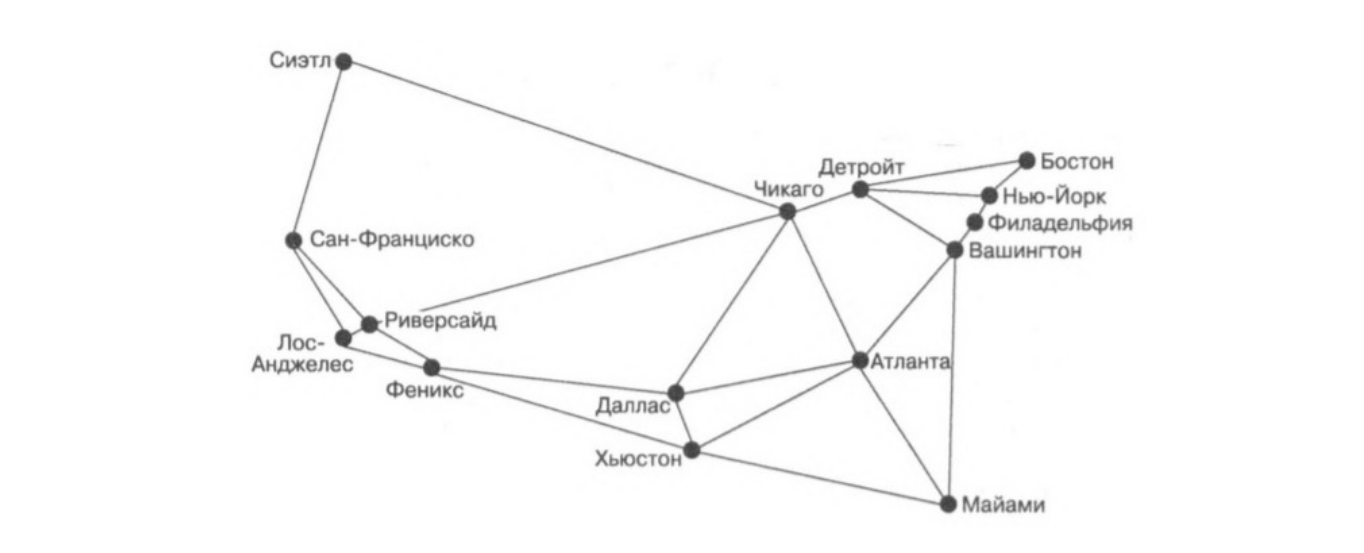
Введем эти данные в графовую структуру

In [8]:
cities = ['Сан-Франциско', 'Лос-Анджелес', 'Риверсайд', 'Феникс', 'Даллас', 'Хьюстон', 'Майами',
          'Атланта', 'Вашингтон', 'Филадельфия', 'Нью-Йорк', 'Бостон', 'Чикаго', 'Детройт', 'Сиэтл']
USA_map = Graph(cities)
print(USA_map)

0: Сан-Франциско --> []
1: Лос-Анджелес --> []
2: Риверсайд --> []
3: Феникс --> []
4: Даллас --> []
5: Хьюстон --> []
6: Майами --> []
7: Атланта --> []
8: Вашингтон --> []
9: Филадельфия --> []
10: Нью-Йорк --> []
11: Бостон --> []
12: Чикаго --> []
13: Детройт --> []
14: Сиэтл --> []



In [9]:
USA_map.add_edge_by_vertex('Сан-Франциско', 'Лос-Анджелес')
USA_map.add_edge_by_vertex('Сан-Франциско', 'Риверсайд')
USA_map.add_edge_by_vertex('Сан-Франциско', 'Сиэтл')

USA_map.add_edge_by_vertex('Риверсайд', 'Чикаго')
USA_map.add_edge_by_vertex('Риверсайд', 'Феникс')
USA_map.add_edge_by_vertex('Риверсайд', 'Лос-Анджелес')

USA_map.add_edge_by_vertex('Феникс', 'Даллас')
USA_map.add_edge_by_vertex('Феникс', 'Хьюстон')
USA_map.add_edge_by_vertex('Феникс', 'Лос-Анджелес')

USA_map.add_edge_by_vertex('Даллас', 'Атланта')
USA_map.add_edge_by_vertex('Даллас', 'Хьюстон')

USA_map.add_edge_by_vertex('Хьюстон', 'Майами')
USA_map.add_edge_by_vertex('Хьюстон', 'Атланта')

USA_map.add_edge_by_vertex('Атланта', 'Майами')
USA_map.add_edge_by_vertex('Атланта', 'Чикаго')
USA_map.add_edge_by_vertex('Атланта', 'Вашингтон')

USA_map.add_edge_by_vertex('Майами', 'Вашингтон')

USA_map.add_edge_by_vertex('Вашингтон', 'Филадельфия')
USA_map.add_edge_by_vertex('Вашингтон', 'Детройт')

USA_map.add_edge_by_vertex('Филадельфия', 'Нью-Йорк')

USA_map.add_edge_by_vertex('Нью-Йорк', 'Бостон')
USA_map.add_edge_by_vertex('Нью-Йорк', 'Детройт')

USA_map.add_edge_by_vertex('Детройт', 'Бостон')
USA_map.add_edge_by_vertex('Детройт', 'Чикаго')

USA_map.add_edge_by_vertex('Чикаго', 'Сиэтл')


print(USA_map)

0: Сан-Франциско --> ['Лос-Анджелес', 'Риверсайд', 'Сиэтл']
1: Лос-Анджелес --> ['Сан-Франциско', 'Риверсайд', 'Феникс']
2: Риверсайд --> ['Сан-Франциско', 'Чикаго', 'Феникс', 'Лос-Анджелес']
3: Феникс --> ['Риверсайд', 'Даллас', 'Хьюстон', 'Лос-Анджелес']
4: Даллас --> ['Феникс', 'Атланта', 'Хьюстон']
5: Хьюстон --> ['Феникс', 'Даллас', 'Майами', 'Атланта']
6: Майами --> ['Хьюстон', 'Атланта', 'Вашингтон']
7: Атланта --> ['Даллас', 'Хьюстон', 'Майами', 'Чикаго', 'Вашингтон']
8: Вашингтон --> ['Атланта', 'Майами', 'Филадельфия', 'Детройт']
9: Филадельфия --> ['Вашингтон', 'Нью-Йорк']
10: Нью-Йорк --> ['Филадельфия', 'Бостон', 'Детройт']
11: Бостон --> ['Нью-Йорк', 'Детройт']
12: Чикаго --> ['Риверсайд', 'Атланта', 'Детройт', 'Сиэтл']
13: Детройт --> ['Вашингтон', 'Нью-Йорк', 'Бостон', 'Чикаго']
14: Сиэтл --> ['Сан-Франциско', 'Чикаго']



In [11]:
USA_map.neighbors_for_vertex('Сиэтл')

['Сан-Франциско', 'Чикаго']

## Обход графа: поиск в глубину (DFS)
Обход графа полезен при исследовании свойств графа. Для таких обходов чаще всего используют **depth-first search (DFS)** и **breadth-first search (BFS)**.



**Поиск в глубину**  

1. Выбирается произвольная вершина и помечается, как посещенная.  
2. На каждой итерации алгоритм обрабатывает непосещенные вершины, смежные с текущей (если таких вершин несколько, то они обрабатываются в произвольном порядке)  
3. Если достигнут тупик - вершина, у которой нет непосещенных смежных вершин, то алгоритм возвращается на одно ребро назад (в вершину, из которой он последний раз сделал переход) и переходит к другой непосещенной смежной вершине  
4. Алгоритм заканчивает свою работу, когда возвращается в начальную вершину, которая к этому моменту становится тупиком

Для выполнения поиска в глубину удобно использовать стек. Вершина помещается в стек, когда впервые посещается (начинается обход вершины), и снимается со стека, когда становится тупиком (обход вершин завершается)

**Пример применения:** проверка связности графа. *Когда поиск в глубину заканчивается, посещенными являются все вершины связного компонента, из которого бралась первоначальная вершина*. Таким образом, что проверить граф на связность, можно поступить следующим образом: начать поиск в глубину с произвольной вершины и по окончании проверить, все ли вершины исходного графа оказались посещенными. Если все, то граф связный. В противной случае - нет.  

In [12]:
class Stack:
    def __init__(self):
        self._container = []
    @property
    def empty(self):
        return len(self._container)==0
    def pop(self):
        return self._container.pop()
    def push(self, elem):
        self._container.append(elem)
    def __repr__(self):
        return repr(self._container)

In [25]:
def dfs(graph, start_vertex):
    available_vertices = Stack() # доступные для посещения вершины
    explored_vertices = [start_vertex] # посещенные вершины
    for vertex in graph.neighbors_for_vertex(start_vertex):
        available_vertices.push(vertex)
        explored_vertices.append(vertex)
        # добавили все вершины, смежные со стартовой, в стек доступных
        
        # добавляем также в посещенные с той целью, чтобы в стеке
        # повторно не хранились одни и те же вершины
        # (e.g. 2 разные вершины могут быть связаны через 3-ю,
        # тогда эта 3-я может добавиться в стек дважды)
    
    while not available_vertices.empty:
        # снимаем со стека вершину
        current_vertex = available_vertices.pop()  
        # смотрим на смежные с ней вершины
        for neighbor_vertex in graph.neighbors_for_vertex(current_vertex):
            # если они уже посещены, то пропускаем их
            if neighbor_vertex in explored_vertices:
                continue
            # иначе - добавляем в доступные и в посещенные
            available_vertices.push(neighbor_vertex)
            explored_vertices.append(neighbor_vertex)
    return explored_vertices

In [27]:
# проверим работу поиска в глубину
print('Посещенные вершины при старте в Бостоне: ',
      dfs(USA_map, 'Бостон'))
print('Количество посещенных вершин: ',
      len(dfs(USA_map, 'Бостон')))
print('Всего вершин в графе: ', USA_map.vertex_count)

Посещенные вершины при старте в Бостоне:  ['Бостон', 'Нью-Йорк', 'Детройт', 'Вашингтон', 'Чикаго', 'Риверсайд', 'Атланта', 'Сиэтл', 'Сан-Франциско', 'Лос-Анджелес', 'Феникс', 'Даллас', 'Хьюстон', 'Майами', 'Филадельфия']
Количество посещенных вершин:  15
Всего вершин в графе:  15


Таким образом, можно убедиться, что наш граф является связным. Проверим теперь свойство связности для другого графа.
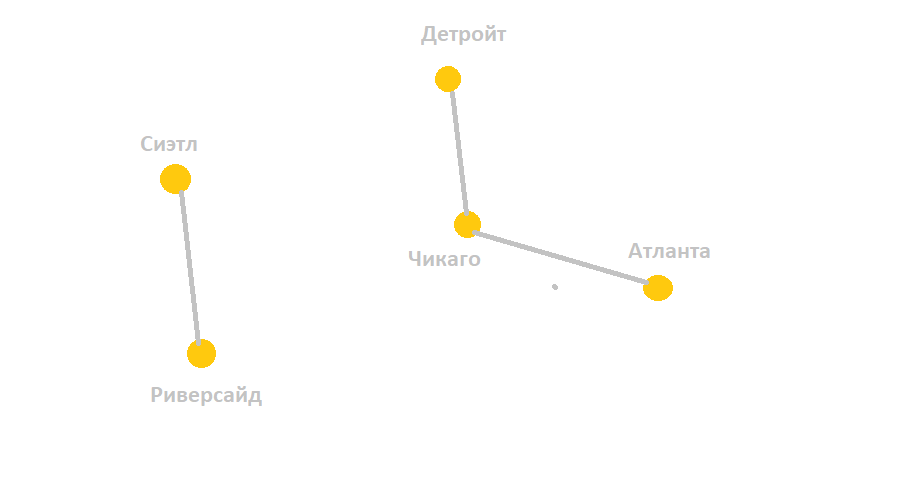

In [28]:
USA_map_not_connected = Graph(['Сиэтл', 'Риверсайд', 'Чикаго',
                               'Детройт', 'Атланта'])

USA_map_not_connected.add_edge_by_vertex('Сиэтл', 'Риверсайд')
USA_map_not_connected.add_edge_by_vertex('Атланта', 'Чикаго')
USA_map_not_connected.add_edge_by_vertex('Атланта', 'Детройт')

new_result = dfs(USA_map_not_connected, 'Чикаго')
print('Посещенные вершины при старте в Чикаго: \n', new_result)
new_result = dfs(USA_map_not_connected, 'Риверсайд')
print('Посещенные вершины при старте в Риверсайде: \n', new_result)

Посещенные вершины при старте в Чикаго: 
 ['Чикаго', 'Атланта', 'Детройт']
Посещенные вершины при старте в Риверсайде: 
 ['Риверсайд', 'Сиэтл']


Время работы поиска в глубину пропорционально размеру испозуемой для представления графа структуры данных. При использовании матрицы смежности временная эффективная обхода в глубину: $\theta(|V|^2)$. При использовании связанных списокв: $\theta(|V|+|E|)$

Поиск в глубину можно использоваться для определения связных компонентов графа. **Лес поиска в глубину** можно использовать для определения ацкиличности графа. Существуют и другие способы применения алгоритма поиска в глубину.

## Поиск кратчайшего пути
Hyperloop для перемещения будет использовать высокоскоростной транспорт, поэтому почти любое расстояние (в рамках разумного) будет преодолеваться за приемлемое время. По этой причине **поиск кратчайшего пути между двумя городами** предполагает поиск такого пути (в терминологии теории графов), который имел бы наименьшую длину (в смысле количества проходимых ребер). Иными словами, *чем меньше остановок на пути, тем лучше*.